<a href="https://colab.research.google.com/github/SachiniWaththuhewa/ML_Project/blob/main/suicide_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

df= pd.read_csv("master.csv")
df.columns=['country','year','sex','age','suicide_no','population','suicides/100k pop','country-year','HDI_for_year','gdp_for_year','gdp_for_capita','generation']

df.head(10)

,country,year,sex,age,suicide_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year,gdp_for_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [10]:
df.shape

(27820, 12)

In [11]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines

alt.LayerChart(...)

In [12]:
import IPython
from google.colab import output

display(IPython.display.Javascript('''
  window.someValue = new Promise(resolve => {
    setTimeout(() => {
      resolve("hello world!");
    }, 100);
  });
'''))


value = output.eval_js('someValue');
value

<IPython.core.display.Javascript object>

'hello world!'

In [13]:
df=df.drop_duplicates()
df.shape

(27820, 12)

In [14]:
df = df[df['suicides/100k pop'] != 0]
df.shape

(23539, 12)

In [15]:
df = df.dropna()
df.shape

(7207, 12)

In [7]:
df.head(10)

,country,year,sex,age,suicide_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year,gdp_for_capita,generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
77,Albania,1995,male,75+ years,1,25100,3.98,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
78,Albania,1995,male,35-54 years,14,375900,3.72,Albania1995,0.619,"2,424,499,009",835,Boomers
79,Albania,1995,female,25-34 years,7,264000,2.65,Albania1995,0.619,"2,424,499,009",835,Generation X
80,Albania,1995,female,35-54 years,8,356400,2.24,Albania1995,0.619,"2,424,499,009",835,Boomers
81,Albania,1995,male,5-14 years,6,376500,1.59,Albania1995,0.619,"2,424,499,009",835,Millenials


In [8]:
df.describe()

,year,suicide_no,population,suicides/100k pop,HDI_for_year,gdp_for_capita
count,7207.000000,7207.000000,7.207000e+03,7207.000000,7207.000000,7207.000000
mean,2005.192729,239.215207,2.132150e+06,13.917101,0.778965,21331.823089
std,8.873141,728.225840,4.208245e+06,17.973110,0.096353,22776.025440
min,1985.000000,1.000000,1.440000e+03,0.020000,0.483000,313.000000
25%,2000.000000,8.000000,2.445685e+05,2.615000,0.711000,4547.000000
50%,2010.000000,42.000000,5.998810e+05,7.640000,0.782000,12584.000000
75%,2012.000000,162.000000,2.060969e+06,17.995000,0.864000,31518.000000
max,2014.000000,11767.000000,4.350934e+07,187.060000,0.944000,126352.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7207 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            7207 non-null   object 
 1   year               7207 non-null   int64  
 2   sex                7207 non-null   object 
 3   age                7207 non-null   object 
 4   suicide_no         7207 non-null   int64  
 5   population         7207 non-null   int64  
 6   suicides/100k pop  7207 non-null   float64
 7   country-year       7207 non-null   object 
 8   HDI_for_year       7207 non-null   float64
 9   gdp_for_year       7207 non-null   object 
 10  gdp_for_capita     7207 non-null   int64  
 11  generation         7207 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 732.0+ KB


In [17]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df['scale_population'] = scale.fit_transform(df['population'].values.reshape(-1,1))
print(df['scale_population'])

72       0.005320
73       0.004058
74       0.000905
75       0.006483
76       0.005511
           ...   
27815    0.083189
27816    0.007976
27817    0.063453
27818    0.060452
27819    0.033040
Name: scale_population, Length: 7207, dtype: float64


In [18]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df['scale_gdp_for_capita'] = scale.fit_transform(df['gdp_for_capita'].values.reshape(-1,1))
print(df['scale_gdp_for_capita'])

72       0.004142
73       0.004142
74       0.004142
75       0.004142
76       0.004142
           ...   
27815    0.015836
27816    0.015836
27817    0.015836
27818    0.015836
27819    0.015836
Name: scale_gdp_for_capita, Length: 7207, dtype: float64


In [19]:
from sklearn.preprocessing import LabelEncoder
lbel_encoder = LabelEncoder()

df['encode_country-year']= lbel_encoder.fit_transform(df[['country-year']])
df[['country-year', 'encode_country-year']].head(25)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,country-year,encode_country-year
72,Albania1995,0
73,Albania1995,0
74,Albania1995,0
75,Albania1995,0
76,Albania1995,0
77,Albania1995,0
78,Albania1995,0
79,Albania1995,0
80,Albania1995,0
81,Albania1995,0


In [20]:
df['encode_sex']= lbel_encoder.fit_transform(df[['sex']])
df[['sex', 'encode_sex']].head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sex,encode_sex
72,male,1
73,male,1
74,female,0
75,female,0
76,male,1


In [22]:
df['encode_age']= lbel_encoder.fit_transform(df[['age']])
df[['age', 'encode_age']].head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,encode_age
72,25-34 years,1
73,55-74 years,4
74,75+ years,5
75,15-24 years,0
76,15-24 years,0
77,75+ years,5
78,35-54 years,2
79,25-34 years,1
80,35-54 years,2
81,5-14 years,3


In [23]:
df['encode_generation']= lbel_encoder.fit_transform(df[['generation']])
df[['generation', 'encode_generation']].head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,generation,encode_generation
72,Generation X,2
73,Silent,5
74,G.I. Generation,1
75,Generation X,2
76,Generation X,2
77,G.I. Generation,1
78,Boomers,0
79,Generation X,2
80,Boomers,0
81,Millenials,4


In [24]:
df.describe()

,year,suicide_no,population,suicides/100k pop,HDI_for_year,gdp_for_capita,scale_population,scale_gdp_for_capita,encode_country-year,encode_sex,encode_age,encode_generation
count,7207.000000,7207.000000,7.207000e+03,7207.000000,7207.000000,7207.000000,7207.000000,7207.000000,7207.000000,7207.000000,7207.000000,7207.000000
mean,2005.192729,239.215207,2.132150e+06,13.917101,0.778965,21331.823089,0.048973,0.166764,345.052727,0.523103,2.423755,2.764534
std,8.873141,728.225840,4.208245e+06,17.973110,0.096353,22776.025440,0.096724,0.180706,198.387803,0.499501,1.717967,1.719725
min,1985.000000,1.000000,1.440000e+03,0.020000,0.483000,313.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,8.000000,2.445685e+05,2.615000,0.711000,4547.000000,0.005588,0.033593,175.000000,0.000000,1.000000,2.000000
50%,2010.000000,42.000000,5.998810e+05,7.640000,0.782000,12584.000000,0.013755,0.097359,341.000000,1.000000,2.000000,3.000000
75%,2012.000000,162.000000,2.060969e+06,17.995000,0.864000,31518.000000,0.047337,0.247582,515.000000,1.000000,4.000000,4.000000
max,2014.000000,11767.000000,4.350934e+07,187.060000,0.944000,126352.000000,1.000000,1.000000,683.000000,1.000000,5.000000,5.000000


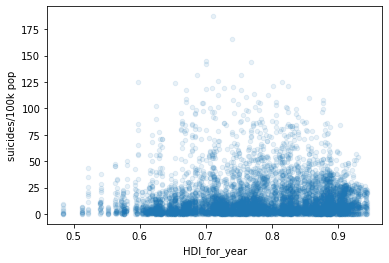

In [25]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='HDI_for_year',y='suicides/100k pop',alpha=0.1)

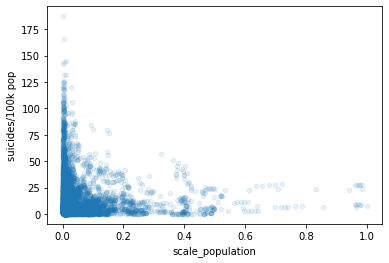

In [26]:
df.plot(kind='scatter',x='scale_population',y='suicides/100k pop',alpha=0.1)

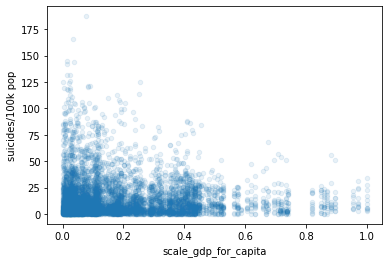

In [27]:
df.plot(kind='scatter',x='scale_gdp_for_capita',y='suicides/100k pop',alpha=0.1)

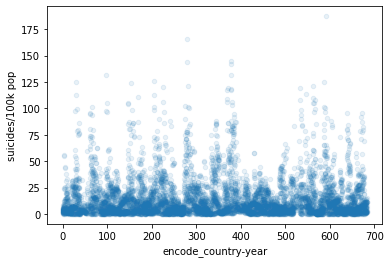

In [28]:
df.plot(kind='scatter',x='encode_country-year',y='suicides/100k pop',alpha=0.1)

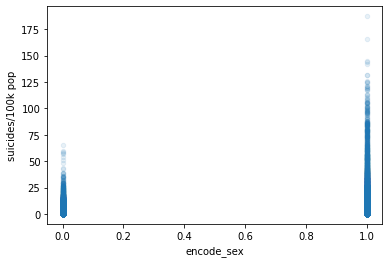

In [ ]:
df.plot(kind='scatter',x='encode_sex',y='suicides/100k pop',alpha=0.1)

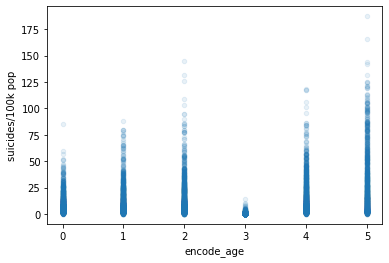

In [29]:
df.plot(kind='scatter',x='encode_age',y='suicides/100k pop',alpha=0.1)

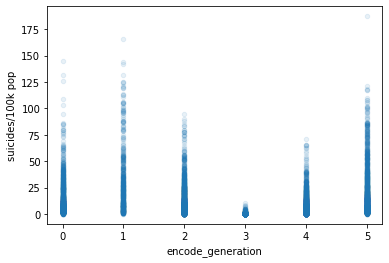

In [30]:
df.plot(kind='scatter',x='encode_generation',y='suicides/100k pop',alpha=0.1)

In [31]:
df.head(5)

,country,year,sex,age,suicide_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year,gdp_for_capita,generation,scale_population,scale_gdp_for_capita,encode_country-year,encode_sex,encode_age,encode_generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X,0.005320,0.004142,0,1,1,2
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent,0.004058,0.004142,0,1,4,5
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation,0.000905,0.004142,0,0,5,1
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X,0.006483,0.004142,0,0,0,2
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X,0.005511,0.004142,0,1,0,2


In [32]:
df.shape

(7207, 18)

In [35]:
X = df.iloc[ : , [8,12,13,14,15,16,17]]
y = df.iloc[ : , 6 ]




# **Linear Regression**

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4 )


In [37]:
import pandas
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
import numpy as np

y_pred = regr.predict(X_test)

from sklearn.metrics import  mean_absolute_error,mean_squared_error,r2_score
result1 = mean_absolute_error(y_test,y_pred)
result2 =np.sqrt(mean_squared_error(y_test,y_pred))
result3 = r2_score(y_test,y_pred)
print("Mean Absolute Error:",result1)
print('Square root of Mean Squared Error :' , result2)
print('R2 score :', result3)


Mean Absolute Error: 10.153092361169708
Square root of Mean Squared Error : 16.1162777500491
R2 score : 0.24572163723576956


# **Decision Tree Regression Model**

In [41]:
from sklearn.tree import DecisionTreeRegressor

dtReg = DecisionTreeRegressor()
dtReg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [42]:
y_pred = dtReg.predict(X_test)

result1 = mean_absolute_error(y_test,y_pred)
result2 =np.sqrt(mean_squared_error(y_test,y_pred))
result3 = r2_score(y_test,y_pred)
print("Mean Absolute Error:",result1)
print('Square root of Mean Squared Error :' , result2)
print('R2 score :', result3)

Mean Absolute Error: 5.153038501560874
Square root of Mean Squared Error : 11.551302621999033
R2 score : 0.6125067995118916


# **Random Forest Regression Model**

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor()
rfReg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred = rfReg.predict(X_test)

result1 = mean_absolute_error(y_test,y_pred)
result2 =np.sqrt(mean_squared_error(y_test,y_pred))
result3 = r2_score(y_test,y_pred)
print("Mean Absolute Error:",result1)
print('Square root of Mean Squared Error :' , result2)
print('R2 score :', result3)

Mean Absolute Error: 4.583748838015955
Square root of Mean Squared Error : 9.665532678737147
R2 score : 0.7286975287004622


# **Neural Networks Regression Model**

In [46]:
from sklearn.neural_network import MLPRegressor

mlpReg = MLPRegressor(hidden_layer_sizes = (7,7,7), activation = 'relu',solver='adam',max_iter=700)
mlpReg.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(7, 7, 7), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=700,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [48]:
y_pred = mlpReg.predict(X_test)

result1 = mean_absolute_error(y_test,y_pred)
result2 =np.sqrt(mean_squared_error(y_test,y_pred))
result3 = r2_score(y_test,y_pred)
print("Mean Absolute Error:",result1)
print('Square root of Mean Squared Error :' , result2)
print('R2 score :', result3)

Mean Absolute Error: 9.999237849517785
Square root of Mean Squared Error : 16.12797768823287
R2 score : 0.244626072403486
